In [1]:
!pip install easyocr
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-cp37-none-any.whl size=25862 sha256=e6e69f9966b006d66fedc61ac18dd1e19b0f3a2eb797f3ea6d0fc677571c30e2
  Stored in directory: C:\Users\HP\AppData\Local\pip\Cache\wheels\db\23\45\fc7424906880ffa9577a2a428b961f2b79e0e21d9f71e7e6bc
Successfully built imutils


In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [180]:
import cv2
import matplotlib.pyplot as plt
cap=cv2.VideoCapture("vehicle.mp4")
total=cap.get(7)
total
cap.set(1,255)
ret,frame=cap.read()
s="C:/Users/HP/Pictures/n_p_i"
cv2.imwrite(s+".jpg",frame)
import pytesseract
from PIL import Image
val=Image.open("C:/Users/HP/Pictures/n_p_i.jpg")


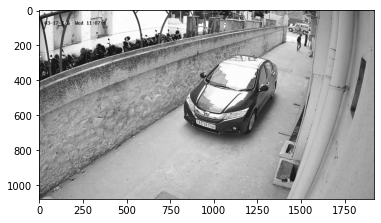

In [181]:
img = cv2.imread('C:/Users/HP/Pictures/n_p_i.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

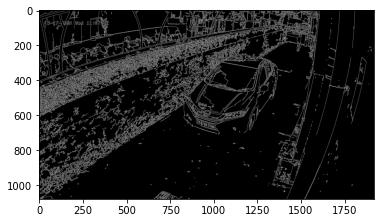

In [182]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [183]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [184]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True )
    if len(approx) == 4:
        location = approx
        break

In [185]:
location

array([[[ 900,  626]],

       [[1008,  657]],

       [[1011,  680]],

       [[ 907,  650]]], dtype=int32)

In [186]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

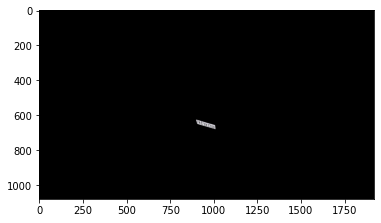

In [187]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [188]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

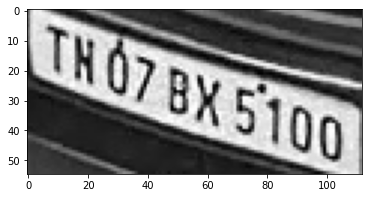

In [189]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [190]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[2.1535010280253495, -2.8780965047138114],
   [51.93256313224698, 11.367486383240847],
   [43.84649897197465, 36.87809650471381],
   [-4.932563132246987, 23.632513616759155]],
  'Itho7 ',
  0.014931794595029494),
 ([[45.335136689233096, 9.07460143262562],
   [115.99890490961856, 32.91894851595625],
   [105.6648633107669, 58.92539856737438],
   [36.00109509038144, 35.08105148404375]],
  'LBX 5100',
  0.37513138921752076)]

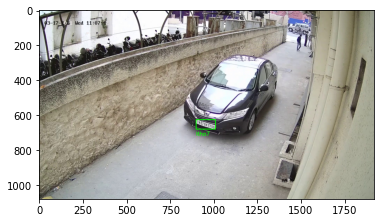

In [191]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))